# CNN 기초 실습

## MNIST 데이터 CNN 분류

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=512)

Epoch 1/5
118/118 [==============================] - 8s 10ms/step - loss: 1.0653 - accuracy: 0.6902
Epoch 2/5
118/118 [==============================] - 1s 10ms/step - loss: 0.1238 - accuracy: 0.9616
Epoch 3/5
118/118 [==============================] - 1s 10ms/step - loss: 0.0731 - accuracy: 0.9780
Epoch 4/5
118/118 [==============================] - 1s 10ms/step - loss: 0.0582 - accuracy: 0.9822
Epoch 5/5
118/118 [==============================] - 1s 10ms/step - loss: 0.0469 - accuracy: 0.9850


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0408 - accuracy: 0.9866


In [ ]:
print(test_acc)

0.9865999817848206


## 꽃 이미지 분류

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 1s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


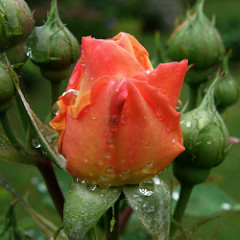

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

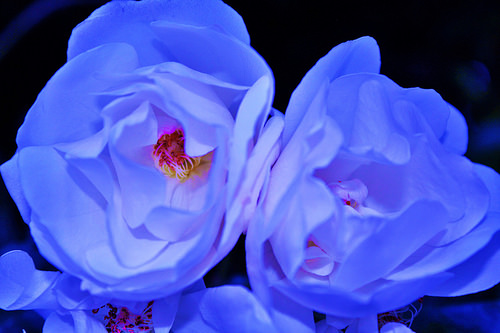

In [ ]:
PIL.Image.open(str(roses[1]))

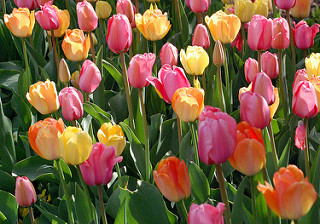

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

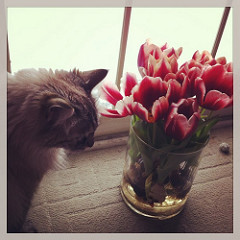

In [ ]:
PIL.Image.open(str(tulips[1]))

In [ ]:
#이미지 사이즈 설정

batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


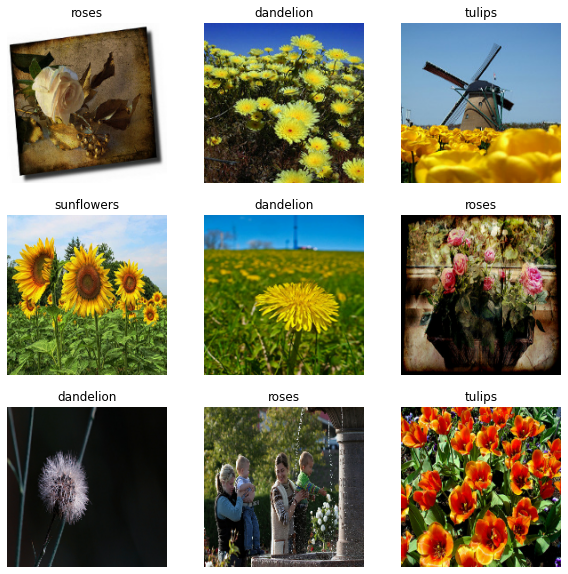

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.96902645


### 실습: 위의 MNIST CNN 예제 코드의 모델링 부분을 바탕으로 빈칸을 채우고 conv layer를 3개 구축한 후 5개의 출력값이 나오는 코드를 작성해보세요.

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)       

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath="model/flower.h5", monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks = [checkpointer, early_stopping_callback]
)

Epoch 1/10
92/92 [==============================] - 4s 38ms/step - loss: 1.7557 - accuracy: 0.2842 - val_loss: 1.2729 - val_accuracy: 0.4387

Epoch 00001: val_loss improved from inf to 1.27294, saving model to model/flower.h5
Epoch 2/10
92/92 [==============================] - 2s 19ms/step - loss: 1.1492 - accuracy: 0.5197 - val_loss: 1.0263 - val_accuracy: 0.6035

Epoch 00002: val_loss improved from 1.27294 to 1.02626, saving model to model/flower.h5
Epoch 3/10
92/92 [==============================] - 2s 20ms/step - loss: 0.9524 - accuracy: 0.6311 - val_loss: 0.9342 - val_accuracy: 0.6349

Epoch 00003: val_loss improved from 1.02626 to 0.93415, saving model to model/flower.h5
Epoch 4/10
92/92 [==============================] - 2s 20ms/step - loss: 0.7135 - accuracy: 0.7436 - val_loss: 0.8844 - val_accuracy: 0.6812

Epoch 00004: val_loss improved from 0.93415 to 0.88444, saving model to model/flower.h5
Epoch 5/10
92/92 [==============================] - 2s 19ms/step - loss: 0.5461 - ac

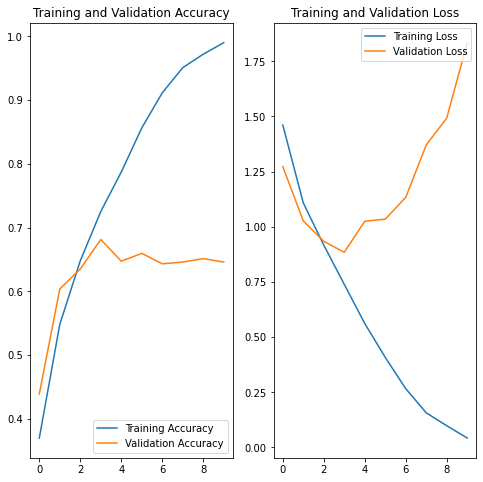

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

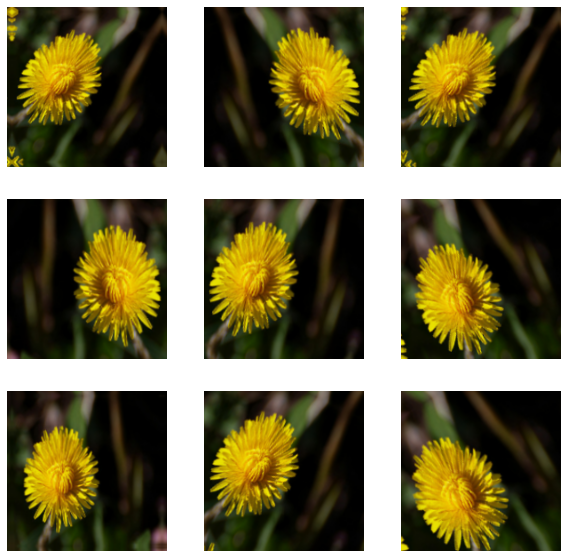

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 3s 28ms/step - loss: 1.4386 - accuracy: 0.3551 - val_loss: 1.1567 - val_accuracy: 0.5204
Epoch 2/15
92/92 [==============================] - 2s 26ms/step - loss: 1.0950 - accuracy: 0.5476 - val_loss: 1.0435 - val_accuracy: 0.6090
Epoch 3/15
92/92 [==============================] - 2s 26ms/step - loss: 0.9652 - accuracy: 0.6311 - val_loss: 0.9523 - val_accuracy: 0.6199
Epoch 4/15
92/92 [==============================] - 2s 26ms/step - loss: 0.8679 - accuracy: 0.6644 - val_loss: 0.8149 - val_accuracy: 0.6812
Epoch 5/15
92/92 [==============================] - 2s 26ms/step - loss: 0.8344 - accuracy: 0.6862 - val_loss: 0.7868 - val_accuracy: 0.6839
Epoch 6/15
92/92 [==============================] - 2s 26ms/step - loss: 0.7290 - accuracy: 0.7215 - val_loss: 0.8425 - val_accuracy: 0.6785
Epoch 7/15
92/92 [==============================] - 2s 26ms/step - loss: 0.7057 - accuracy: 0.7355 - val_loss: 0.7776 - val_accuracy: 0.7044
Epoch 8/15
92

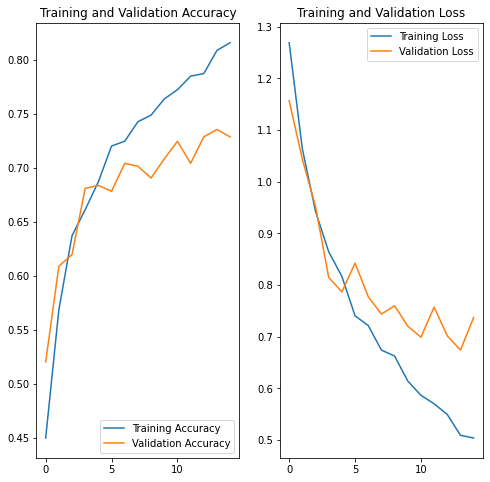

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

122880/117948 [===============================] - 0s 0us/step
This image most likely belongs to sunflowers with a 98.93 percent confidence.


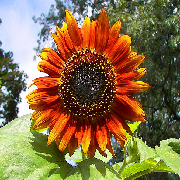

In [ ]:
img

In [ ]:
from io import BytesIO
import urllib

def loadImage(URL):
    with urllib.request.urlopen(URL) as url:
        img = keras.preprocessing.image.load_img(BytesIO(url.read()), target_size=(180, 180))

    return img

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflowers with a 98.93 percent confidence.


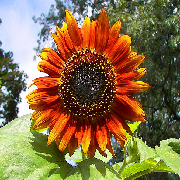

In [ ]:
img

### 실습: 위에 daisy 꽃 사진을 불러와서 이미지 분류 결과를 출력하는 코드를 참고하여 종류 별로 직접 꽃 사진 URL을 가져와서 모델 예측 결과를 확인해보고 해당 이미지도 출력해보세요.

In [ ]:
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## 강아지 고양이 분류 모델, CNN

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
filenames = os.listdir("/content/drive/My Drive/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df = df.sample(500)

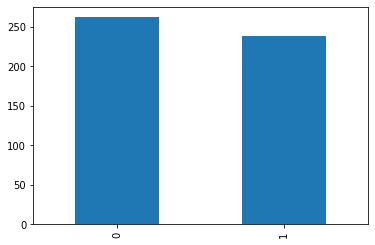

In [ ]:
df['category'].value_counts().plot.bar()

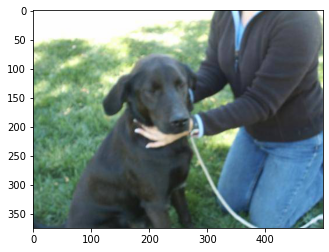

In [ ]:
sample = random.choice(filenames)
image = load_img("/content/drive/My Drive/train/"+sample)
plt.imshow(image)

### 실습: MNIST 예제와 이전 실습 모델링 내용을 토대로 3층 CNN 모델링을 구현해보세요. 2개의 출력값이 나와야 합니다.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)       

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
earlystop = EarlyStopping(patience=10)

In [ ]:
callbacks = [earlystop]

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

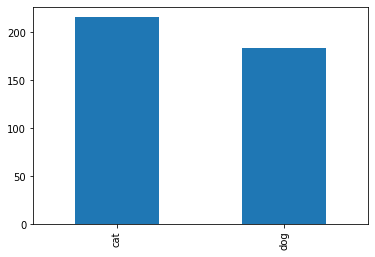

In [ ]:
train_df['category'].value_counts().plot.bar()

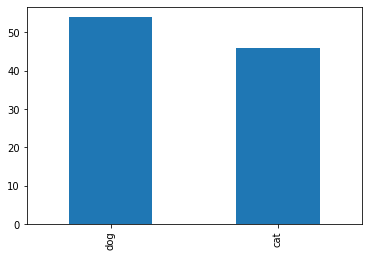

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=4

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/drive/My Drive/data/DogCat/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 400 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/drive/My Drive/data/DogCat/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 100 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
epochs=10

history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
60/60 [==============================] - 88s 1s/step - loss: 1.2932 - accuracy: 0.5238 - val_loss: 3.7464 - val_accuracy: 0.7000
Epoch 2/10
60/60 [==============================] - 2s 34ms/step - loss: 1.0590 - accuracy: 0.5696 - val_loss: 4.7665 - val_accuracy: 0.7000
Epoch 3/10
60/60 [==============================] - 2s 34ms/step - loss: 0.8660 - accuracy: 0.5781 - val_loss: 5.1517 - val_accuracy: 0.7000
Epoch 4/10
60/60 [==============================] - 2s 34ms/step - loss: 0.7747 - accuracy: 0.6421 - val_loss: 4.3126 - val_accuracy: 0.7000
Epoch 5/10
60/60 [==============================] - 2s 34ms/step - loss: 0.9295 - accuracy: 0.5574 - val_loss: 3.1374 - val_accuracy: 0.7000
Epoch 6/10
60/60 [==============================] - 2s 34ms/step - loss: 0.7662 - accuracy: 0.6572 - val_loss: 1.6109 - val_accuracy: 0.7000
Epoch 7/10
60/60 [==============================] - 2s 34ms/step - loss: 0.6799 - accuracy: 0.6346 - val_loss: 0.7380 - val_accuracy: 0.7000
Epoch 8/10
60/

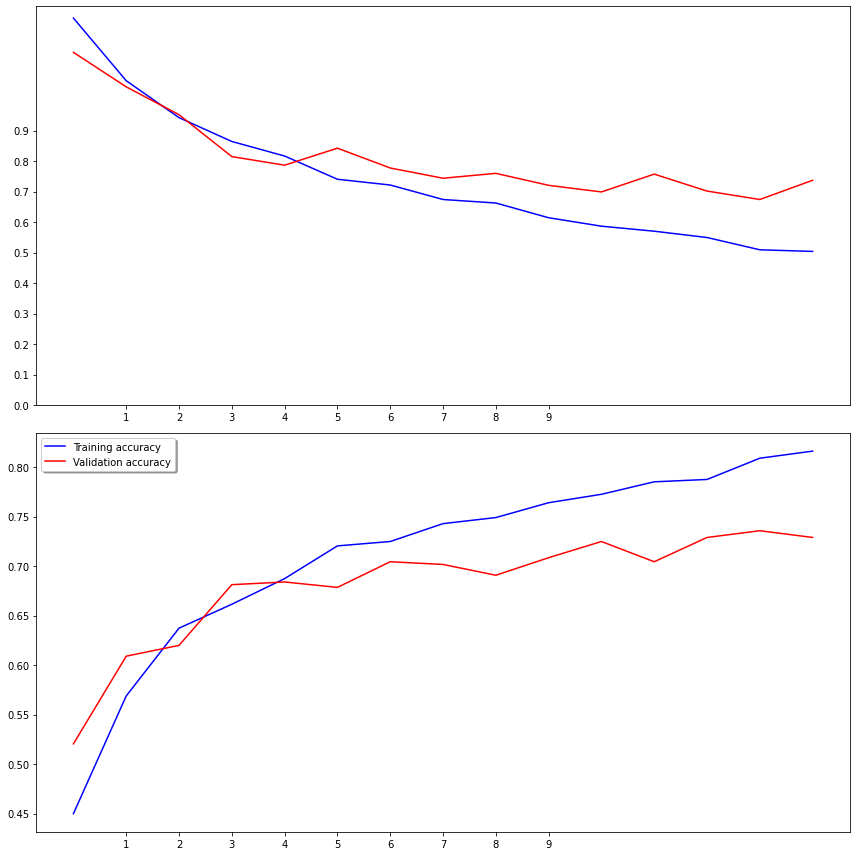

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## 강아지 고양이 분류 모델, VGG 16 fine-tuning

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filenames = os.listdir("/content/drive/My Drive/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append("1")
    else:
        categories.append("0")

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

,filename,category
0,cat.134.jpg,0
1,cat.130.jpg,0
2,cat.133.jpg,0
3,cat.132.jpg,0
4,cat.131.jpg,0


In [ ]:
df = df.sample(300)

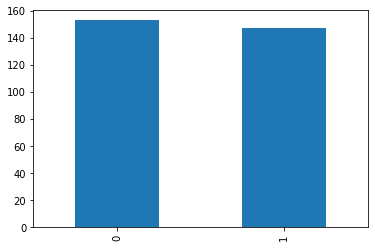

In [ ]:
df['category'].value_counts().plot.bar()

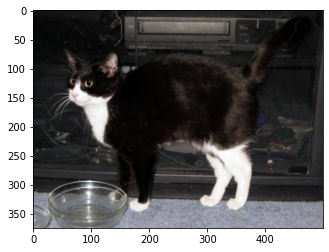

In [ ]:
sample = random.choice(filenames)
image = load_img("/content/drive/My Drive/train/"+sample)
plt.imshow(image)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 4

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/drive/My Drive/data/DogCat/train/",
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 270 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/drive/My Drive/data/DogCat/train/",
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 30 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
epochs=10

history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: ignored

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


ValueError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


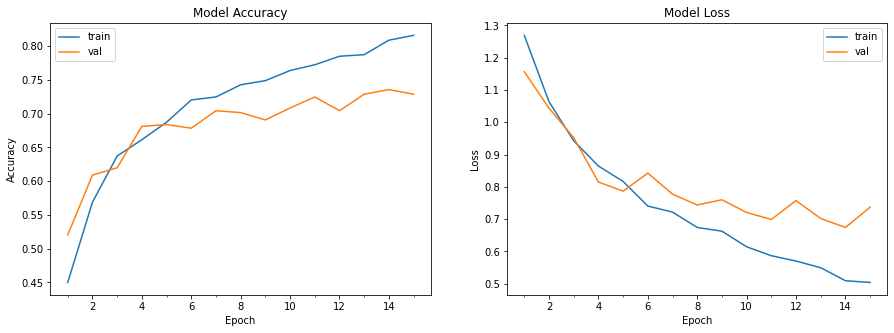

In [ ]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(history)

## 영화 리뷰 분석

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

In [ ]:
# lets import some stuff
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
from keras.models import Model
from keras.layers import *
from keras.utils.np_utils import to_categorical
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/Movie_Review/train.tsv', delimiter='\t')
df = df[['Phrase', 'Sentiment']]
df = df.sample(20000)

pd.set_option('display.max_colwidth', -1)
df.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


,Phrase,Sentiment
57348,saves,3
114307,do find enough material to bring Kissinger 's record into question and explain how the diplomat 's tweaked version of statecraft may have cost thousands and possibly millions of lives .,2
24163,Sean Penn 's,2


개인 PC에서 데이터를 학습하기 어려울 수 있으므로 sample을 추출해서 실습 진행하겠습니다.

In [ ]:
def clean_str(in_str):
    in_str = str(in_str)
    # replace urls with 'url'
    in_str = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})", "url", in_str)
    in_str = re.sub(r'([^\s\w]|_)+', '', in_str)
    return in_str.strip().lower()


df['text'] = df['Phrase'].apply(clean_str)

In [ ]:
df.Sentiment.value_counts()

2    10196
3    4298 
1    3500 
4    1152 
0    854  
Name: Sentiment, dtype: int64

In [ ]:
df_0 = df[df['Sentiment'] == 0].sample(frac=1)
df_1 = df[df['Sentiment'] == 1].sample(frac=1)
df_2 = df[df['Sentiment'] == 2].sample(frac=1)
df_3 = df[df['Sentiment'] == 3].sample(frac=1)
df_4 = df[df['Sentiment'] == 4].sample(frac=1)

# we want a balanced set for training against - there are 7072 `0` examples
sample_size = 7072

data = pd.concat([df_0.head(sample_size), df_1.head(sample_size), df_2.head(sample_size), df_3.head(sample_size), df_4.head(sample_size)]).sample(frac=1)

In [ ]:
data['l'] = data['Phrase'].apply(lambda x: len(str(x).split(' ')))
print("mean length of sentence: " + str(data.l.mean()))
print("max length of sentence: " + str(data.l.max()))
print("std dev length of sentence: " + str(data.l.std()))

mean length of sentence: 7.559077980564115
max length of sentence: 52
std dev length of sentence: 7.210264696444044


In [ ]:
# these sentences aren't that long so we may as well use the whole string
sequence_length = 52

In [ ]:
max_features = 20000 # this is the number of words we care about

tokenizer = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>')
tokenizer.fit_on_texts(data['Phrase'].values)

# this takes our sentences and replaces each word with an integer
X = tokenizer.texts_to_sequences(data['Phrase'].values)

# we then pad the sequences so they're all the same length (sequence_length)
X = pad_sequences(X, sequence_length)

y = pd.get_dummies(data['Sentiment']).values

# where there isn't a test set, Kim keeps back 10% of the data for testing, I'm going to do the same since we have an ok amount to play with
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print("test set size " + str(len(X_test)))

test set size 1688


In [ ]:
from tensorflow.python.keras import regularizers

In [ ]:
embedding_dim = 200 # Kim uses 300 here
num_filters = 100

inputs = Input(shape=(sequence_length,), dtype='int32')

# use a random embedding for the text
embedding_layer = Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=sequence_length)(inputs)

reshape = Reshape((sequence_length, embedding_dim, 1))(embedding_layer)

# Note the relu activation which Kim specifically mentions
# He also uses an l2 constraint of 3
# Also, note that the convolution window acts on the whole 200 dimensions - that's important
conv_0 = Conv2D(num_filters, kernel_size=(3, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(4, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(5, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)

# perform max pooling on each of the convoluations
maxpool_0 = MaxPool2D(pool_size=(sequence_length - 3 + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - 4 + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - 5 + 1, 1), strides=(1,1), padding='valid')(conv_2)

# concat and flatten
concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)

# do dropout and predict
dropout = Dropout(0.5)(flatten)
output = Dense(units=5, activation='softmax')(dropout)

In [ ]:
model = Model(inputs=inputs, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 52)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 52, 200)      4000000     input_1[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 52, 200, 1)   0           embedding[0][0]                  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 1, 100)   60100       reshape[0][0]                    
______________________________________________________________________________________________

In [ ]:
batch_size = 32 # Kim uses 50 here, I have a slightly smaller sample size than num
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/10
428/428 [==============================] - 24s 38ms/step - loss: 2.2723 - accuracy: 0.4130 - val_loss: 1.3913 - val_accuracy: 0.3897
Epoch 2/10
428/428 [==============================] - 16s 37ms/step - loss: 1.3891 - accuracy: 0.4170 - val_loss: 1.3927 - val_accuracy: 0.3897
Epoch 3/10
428/428 [==============================] - 16s 37ms/step - loss: 1.3840 - accuracy: 0.4243 - val_loss: 1.3967 - val_accuracy: 0.3897
Epoch 4/10
428/428 [==============================] - 16s 37ms/step - loss: 1.3880 - accuracy: 0.4240 - val_loss: 1.4088 - val_accuracy: 0.3897
Epoch 5/10
428/428 [==============================] - 16s 37ms/step - loss: 1.4014 - accuracy: 0.4174 - val_loss: 1.4869 - val_accuracy: 0.3897
Epoch 6/10
428/428 [==============================] - 16s 37ms/step - loss: 1.4087 - accuracy: 0.4151 - val_loss: 1.4887 - val_accuracy: 0.3897
Epoch 7/10
428/428 [==============================] - 16s 37ms/step - loss: 1.3989 - accuracy: 0.4242 - val_loss: 1.4663 - val_accuracy:

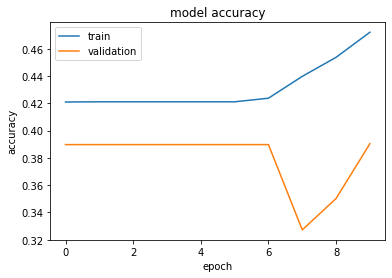

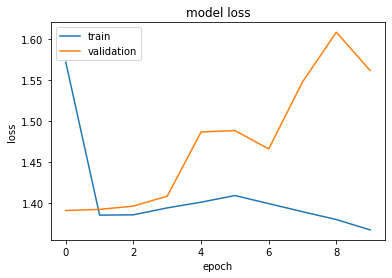

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
accuracy_score(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))

0.4253554502369668

In [ ]:
confusion_matrix(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))

array([[  0,   0,  49,  27,   0],
       [  0,   0, 254,  81,   0],
       [  0,   0, 574, 150,   0],
       [  0,   0, 290, 144,   0],
       [  0,   0,  63,  56,   0]])

## Kim-CNN 악성댓글 분류

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 14.2MB/s 
     |████████████████████████████████| 460kB 56.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
import pandas as pd
import re
import konlpy
from konlpy.tag import Okt
from tensorflow.keras.callbacks import ModelCheckpoint
import sklearn
import multiprocessing

In [ ]:
okt = Okt()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
toxic =  pd.read_csv('/content/drive/My Drive/toxic_sample.csv').drop(["Unnamed: 0"], axis = 1)

In [ ]:
toxic.head()

,Toxic Comment,악성댓글
0,얘가 이쁜긴 한데 좀 멍청하긴하지아이유처럼 똑부러지진 않은 듯...,1
1,결국 또 PC가...,0
2,구씨 그냥 인도네시아로 이민가세요.. 니 미친 팬들이 그나라에 있어.,1
3,30대 국산남들 지능수준 ㅋㅋㅋㅋㅋㅋㅋ 지나가던 개가 나을듯,1
4,한남들이 어떤 딴지를 걸지 구경하러 왔다,1


In [ ]:
#순수 한글 추출
def test(s):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', s)
    return result

toxic['Toxic Comment']= toxic['Toxic Comment'].apply(str)
toxic['Toxic Comment'] = toxic.apply(lambda row: test(row['Toxic Comment']), axis=1)

In [ ]:
toxic['token'] = toxic.apply(lambda row: okt.morphs(row['Toxic Comment'], stem = True, norm = True), axis=1)

In [ ]:
toxic.head()

,Toxic Comment,악성댓글,token
0,얘가 이쁜긴 한데 좀 멍청하긴하지아이유처럼 똑부러지진 않은 듯,1,"[얘, 가, 이쁘다, 한데, 좀, 멍청하다, 아이유, 처럼, 똑, 부러지다, 않다, 듯]"
1,결국 또 가,0,"[결국, 또, 가다]"
2,구씨 그냥 인도네시아로 이민가세요 니 미친 팬들이 그나라에 있어,1,"[구씨, 그냥, 인도네시아, 로, 이민, 가세, 요, 니, 미치다, 팬, 들, 이,..."
3,대 국산남들 지능수준 ㅋㅋㅋㅋㅋㅋㅋ 지나가던 개가 나을듯,1,"[대다, 국산, 남, 들, 지능, 수준, ㅋㅋㅋ, 지나가다, 개, 가, 나다]"
4,한남들이 어떤 딴지를 걸지 구경하러 왔다,1,"[한남, 들, 이, 어떻다, 딴지, 를, 걸다, 구경, 하다, 오다]"


In [ ]:
toxic = toxic[['token', '악성댓글']]

In [ ]:
import sklearn.model_selection
from tensorflow.keras.preprocessing.text import Tokenizer

np.random.seed(777)
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
maxlen = toxic["token"].apply(len).max()
tokenizer.fit_on_texts(toxic['token'])

In [ ]:
train, val, test = np.split(toxic.sample(frac=1), [int(.6*len(toxic)), int(.8*len(toxic))])

sequences = tokenizer.texts_to_sequences(train['token'])
x_train = keras.preprocessing.sequence.pad_sequences(sequences, maxlen = maxlen)
sequences = tokenizer.texts_to_sequences(val['token'])
x_val = keras.preprocessing.sequence.pad_sequences(sequences, maxlen = maxlen)
sequences = tokenizer.texts_to_sequences(test['token'])
x_test = keras.preprocessing.sequence.pad_sequences(sequences, maxlen = maxlen)

In [ ]:
y_train = pd.get_dummies(train['악성댓글'].apply(str)).values
y_val = pd.get_dummies(val['악성댓글'].apply(str)).values
y_test = pd.get_dummies(test['악성댓글'].apply(str)).values

In [ ]:
len(tokenizer.word_counts)

5494

In [ ]:
words_count = len(tokenizer.word_counts)

In [ ]:
maxlen

127

In [ ]:
embed_dim = 128

inputs = tf.keras.layers.Input(shape = (maxlen, ))
emb = tf.keras.layers.Embedding(words_count+1, embed_dim)(inputs)
emb = tf.keras.layers.Reshape((maxlen, embed_dim, 1))(emb)

In [ ]:
cnn1 = layers.Conv2D(activation= 'relu',filters=100, kernel_size=(1,embed_dim), strides=(1,1))(emb)
cnn1_pool = layers.MaxPool2D(strides=(1,1), pool_size=(maxlen,1))(cnn1)
cnn1_pool = layers.Flatten()(cnn1_pool)

cnn2 = layers.Conv2D(activation= 'relu',filters=100, kernel_size=(2,embed_dim), strides=(1,1))(emb)
cnn2_pool = layers.MaxPool2D(strides=(1,1), pool_size=(maxlen-1,1))(cnn2)
cnn2_pool = layers.Flatten()(cnn2_pool)

cnn3 = layers.Conv2D(activation= 'relu',filters=100, kernel_size=(3,embed_dim), strides=(1,1))(emb)
cnn3_pool = layers.MaxPool2D(strides=(1,1), pool_size=(maxlen-2,1))(cnn3)
cnn3_pool = layers.Flatten()(cnn3_pool)

cnn4 = layers.Conv2D(activation= 'relu',filters=100, kernel_size=(4,embed_dim), strides=(1,1))(emb)
cnn4_pool = layers.MaxPool2D(strides=(1,1), pool_size=(maxlen-3,1))(cnn4)
cnn4_pool = layers.Flatten()(cnn4_pool)

cnn5 = layers.Conv2D(activation= 'relu',filters=100, kernel_size=(5,embed_dim), strides=(1,1))(emb)
cnn5_pool = layers.MaxPool2D(strides=(1,1), pool_size=(maxlen-4,1))(cnn5)
cnn5_pool = layers.Flatten()(cnn5_pool)

'''
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
'''

cnn_concated = layers.concatenate([cnn1_pool,cnn2_pool,cnn3_pool, cnn4_pool, cnn5_pool])

dr = layers.Dropout(0.3)(cnn_concated)

outputs = layers.Dense(2, activation="sigmoid")(dr)

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 127)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 127, 128)     703360      input_2[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 127, 128, 1)  0           embedding[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 127, 1, 100)  12900       reshape[0][0]                    
____________________________________________________________________________________________

In [ ]:
callbacks = ModelCheckpoint("model1.h1", monitor='val_loss', mode = 'auto', verbose=1, save_best_only=True, save_weights_only=True)

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])

model.fit(
    x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val), callbacks= [callbacks]
)

Epoch 1/5
19/19 [==============================] - 2s 68ms/step - loss: 0.6937 - accuracy: 0.5032 - val_loss: 0.6851 - val_accuracy: 0.5150

Epoch 00001: val_loss improved from inf to 0.68511, saving model to model1.h1
Epoch 2/5
19/19 [==============================] - 0s 20ms/step - loss: 0.6612 - accuracy: 0.5502 - val_loss: 0.6468 - val_accuracy: 0.6500

Epoch 00002: val_loss improved from 0.68511 to 0.64679, saving model to model1.h1
Epoch 3/5
19/19 [==============================] - 0s 20ms/step - loss: 0.5408 - accuracy: 0.8831 - val_loss: 0.5562 - val_accuracy: 0.7075

Epoch 00003: val_loss improved from 0.64679 to 0.55619, saving model to model1.h1
Epoch 4/5
19/19 [==============================] - 0s 21ms/step - loss: 0.2785 - accuracy: 0.9537 - val_loss: 0.5496 - val_accuracy: 0.7200

Epoch 00004: val_loss improved from 0.55619 to 0.54961, saving model to model1.h1
Epoch 5/5
19/19 [==============================] - 0s 21ms/step - loss: 0.0885 - accuracy: 0.9848 - val_loss: 0.

In [ ]:
model.load_weights("model1.h1")

In [ ]:
m_pred = model.predict(x_test)

In [ ]:
pred = np.argmax(m_pred, axis=1)
true = np.argmax(y_test, axis=1)

In [ ]:
print(sklearn.metrics.classification_report(true, pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       182
           1       0.75      0.70      0.72       218

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



### 실습: 모델 하이퍼파라미터 및 층 개수 조절, 단어 제한, 문장 길이 제한, 모델 학습 등 다양한 변수들을 조절해서 최고의 성능에 도달해보세요. 저장된 모델이 지워질 수 있기 때문에 결과가 잘 나왔다고 생각되는 모델은 꼭 따로 저장해두시는걸 추천드립니다.